In [130]:
import pandas as pd
import numpy as np
import seaborn as sns

In [131]:
datos=pd.read_excel(open('C:/Users/andre/OneDrive/Documentos/taller1/taller1/datos.xls', 'rb'),sheet_name='Información Histórica') 

In [132]:
datos.head()

,Número de llegada,Hospital al que llega,GRD,Día de llegada,Día de salida,Estadia
0,1,Instituto Traumatológico Dr. Teodoro Gebauer,GRD3,1.0,4,3
1,2,Hospital Clínico San Borja-Arriarán,GRD7,1.0,5,4
2,3,Hospital Dr. Luis Tisné B.,GRD7,1.0,5,4
3,4,Hospital Dr. Exequiel González Cortés,GRD10,1.0,11,10
4,5,Hospital Barros Luco Trudeau,GRD6,1.0,6,5


In [133]:
# Información 
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Número de llegada      65534 non-null  int64  
 1   Hospital al que llega  65534 non-null  object 
 2   GRD                    65534 non-null  object 
 3   Día de llegada         65532 non-null  float64
 4   Día de salida          65534 non-null  int64  
 5   Estadia                65532 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 3.0+ MB


In [134]:
#Describir los datos

datos.describe()

,Número de llegada,Día de llegada,Día de salida
count,65534.000000,65532.000000,65534.000000
mean,32767.500000,215.913828,221.399579
std,18918.180608,122.152906,122.175407
min,1.000000,1.000000,4.000000
25%,16384.250000,110.000000,116.000000
50%,32767.500000,219.000000,225.000000
75%,49150.750000,322.000000,327.000000
max,65534.000000,424.000000,434.000000


In [135]:
## valores duplicados

datos.duplicated().sum()

0

C:\Users\andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Estadia', ylabel='count'>

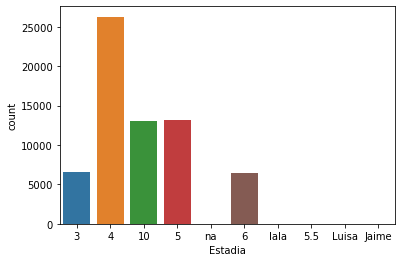

In [15]:
#Plot the unique values

sns.countplot(datos['Estadia'])

In [136]:
# encontrar valores null 

datos.isnull().sum()

Número de llegada        0
Hospital al que llega    0
GRD                      0
Día de llegada           2
Día de salida            0
Estadia                  2
dtype: int64

<AxesSubplot:>

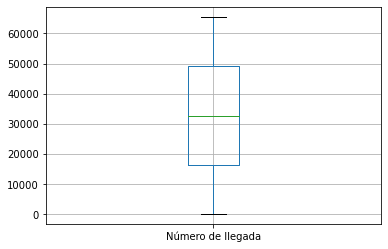

In [18]:
## boxplot para variables cuantitativas 

datos[["Número de llegada"]].boxplot()

<AxesSubplot:>

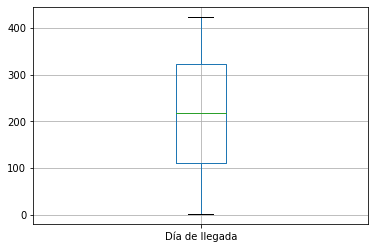

In [19]:
datos[["Día de llegada"]].boxplot()

<AxesSubplot:>

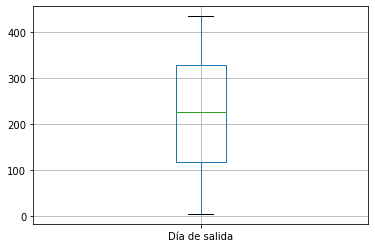

In [20]:
datos[["Día de salida"]].boxplot()

In [137]:
print(datos.iloc[:15,:])

    Número de llegada                              Hospital al que llega  \
0                   1       Instituto Traumatológico Dr. Teodoro Gebauer   
1                   2                Hospital Clínico San Borja-Arriarán   
2                   3                         Hospital Dr. Luis Tisné B.   
3                   4              Hospital Dr. Exequiel González Cortés   
4                   5                       Hospital Barros Luco Trudeau   
5                   6  Instituto Nacional de Enfermedades Respiratori...   
6                   7                    Hospital Dr. Félix Bulnes Cerda   
7                   8                         Hospital Dr. Luis Tisné B.   
8                   9                              Hospital Del Salvador   
9                  10       Instituto Traumatológico Dr. Teodoro Gebauer   
10                 11  Hospital de Urgencia Asistencia Pública Dr. Al...   
11                 12                     Complejo Hospitalario San José   
12          

In [138]:
datos['Estadia'].replace([np.nan,"Jaime","lala","Luisa","na"],0,inplace = True)
datos.head()

,Número de llegada,Hospital al que llega,GRD,Día de llegada,Día de salida,Estadia
0,1,Instituto Traumatológico Dr. Teodoro Gebauer,GRD3,1.0,4,3.0
1,2,Hospital Clínico San Borja-Arriarán,GRD7,1.0,5,4.0
2,3,Hospital Dr. Luis Tisné B.,GRD7,1.0,5,4.0
3,4,Hospital Dr. Exequiel González Cortés,GRD10,1.0,11,10.0
4,5,Hospital Barros Luco Trudeau,GRD6,1.0,6,5.0


In [139]:
print(datos.iloc[:15,:])

    Número de llegada                              Hospital al que llega  \
0                   1       Instituto Traumatológico Dr. Teodoro Gebauer   
1                   2                Hospital Clínico San Borja-Arriarán   
2                   3                         Hospital Dr. Luis Tisné B.   
3                   4              Hospital Dr. Exequiel González Cortés   
4                   5                       Hospital Barros Luco Trudeau   
5                   6  Instituto Nacional de Enfermedades Respiratori...   
6                   7                    Hospital Dr. Félix Bulnes Cerda   
7                   8                         Hospital Dr. Luis Tisné B.   
8                   9                              Hospital Del Salvador   
9                  10       Instituto Traumatológico Dr. Teodoro Gebauer   
10                 11  Hospital de Urgencia Asistencia Pública Dr. Al...   
11                 12                     Complejo Hospitalario San José   
12          

In [140]:

#datos=pd.read_excel(open('C:/Users/andre/OneDrive/Documentos/taller1/taller1/datos.xls', 'rb'),sheet_name='Información Histórica') 
datos['Estadia'].replace([np.nan,"Jaime","lala","Luisa","na"],0,inplace = True)

def esta_difere(df):
    #df['Estadia'] = (df['Día de salida'] - df['Día de llegada'])
    new_df = df[df['Estadia']==0].copy()
    new_df['Estadia'] = (new_df['Día de salida'] - new_df['Día de llegada'])
    df[df['Estadia']==0] = new_df 
    #return df

esta_difere(datos)
print(datos.iloc[:15,:])

    Número de llegada                              Hospital al que llega  \
0                   1       Instituto Traumatológico Dr. Teodoro Gebauer   
1                   2                Hospital Clínico San Borja-Arriarán   
2                   3                         Hospital Dr. Luis Tisné B.   
3                   4              Hospital Dr. Exequiel González Cortés   
4                   5                       Hospital Barros Luco Trudeau   
5                   6  Instituto Nacional de Enfermedades Respiratori...   
6                   7                    Hospital Dr. Félix Bulnes Cerda   
7                   8                         Hospital Dr. Luis Tisné B.   
8                   9                              Hospital Del Salvador   
9                  10       Instituto Traumatológico Dr. Teodoro Gebauer   
10                 11  Hospital de Urgencia Asistencia Pública Dr. Al...   
11                 12                     Complejo Hospitalario San José   
12          

In [141]:
datos['Día de llegada'].replace(np.nan,0,inplace = True)

def diallegada_difere(df):
    #df['Estadia'] = (df['Día de salida'] - df['Día de llegada'])
    new_df = df[df['Día de llegada']==0].copy()
    new_df['Día de llegada'] = (new_df['Día de salida'] - new_df['Estadia'])
    df[df['Día de llegada']==0] = new_df 

diallegada_difere(datos)
print(datos.iloc[:15,:])

    Número de llegada                              Hospital al que llega  \
0                   1       Instituto Traumatológico Dr. Teodoro Gebauer   
1                   2                Hospital Clínico San Borja-Arriarán   
2                   3                         Hospital Dr. Luis Tisné B.   
3                   4              Hospital Dr. Exequiel González Cortés   
4                   5                       Hospital Barros Luco Trudeau   
5                   6  Instituto Nacional de Enfermedades Respiratori...   
6                   7                    Hospital Dr. Félix Bulnes Cerda   
7                   8                         Hospital Dr. Luis Tisné B.   
8                   9                              Hospital Del Salvador   
9                  10       Instituto Traumatológico Dr. Teodoro Gebauer   
10                 11  Hospital de Urgencia Asistencia Pública Dr. Al...   
11                 12                     Complejo Hospitalario San José   
12          

C:\Users\andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Estadia', ylabel='count'>

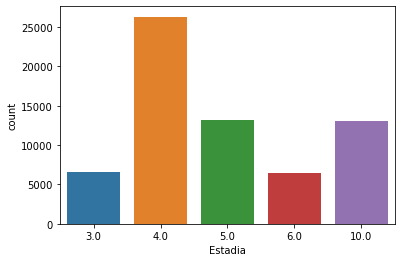

In [32]:
sns.countplot(datos['Estadia'])